# Introduction to Data Science
## Homework 3

Student Name: Benjamin Jakubowski

Student Netid: buj201
***

### Part 1
Assume that $X$ and $Y$ are discrete random variables. The formulas for Mutual Information, Entropy and Conditional Entropy are given by:

$$\text{Mutual Information} = \sum_{y \in Y} \sum_{x \in X} p(x, y) \cdot log\frac{p(x, y)}{p(x)p(y)}$$

$$\text{Entropy} = H(Y) = -\sum_{y \in Y} p(y) \cdot log(p(y))$$

$$\text{Conditional Entropy} = H(Y \mid X) = \sum_{x \in X} p(x) \cdot H(Y \mid X = x)$$

Show mathematically that $\text{Mutual Information} = \text{Information Gain}$, where $\text{Information Gain} = H(Y) – H(Y \mid X)$. Give the derivation below (note, this can be done using Latek math notation, which renders nicely. See above. Feel free to do it by hand and submit an image of your proof).

We will show Mutal Information = Information Gain = $H(Y) - H(Y|X)$.

First, recall
$H(Y) = -\sum_{y \in Y} p(y) \cdot log(p(y))$

and

$
\begin{align*}
H(Y|X) &= \sum_{x \in X} P_{X}(x) \cdot H(Y | X = x) \\
   &= \sum_{x \in X} P_{X}(x) \left[-\sum_{y \in Y} P_{Y | X}(y |x) \cdot log(P_{Y | X}(y | x)) \right] \\
   &= -\sum_{y \in Y} \sum_{x \in X} P_{X}(x) P_{Y | X}(y | x) \cdot log(P_{Y | X}(y | x))
\end{align*}
$

Now recall $P_{Y | X}(y | x) = \frac{P_{X,Y}(x,y)}{P_{X}(x)}$ and (equivalently) $P_{Y | X}(y | x) \cdot P_{X}(x) = P_{X,Y}(x,y)$. Therefore, substitution yields

$
\begin{equation*}
H(Y|X) = -\sum_{y \in Y} \sum_{x \in X} P_{X, Y}(x, y) \cdot log\left(\frac{P_{X,Y}(x,y)}{P_{X}(x)}\right)
\end{equation*}
$

Now, let's consider $H(Y)$. Recall $P_{Y}(y) = \sum_{x \in X} P_{X,Y}(x,y)$. Therefore, we can expand $H(Y)$ by rewriting the marginal pmf $P_{Y}(y)$ as a sum:

$
\begin{align*}
H(Y) &= -\sum_{y \in Y} log(p(y))\cdot p(y) \\
   &= -\sum_{y \in Y} log(p(y))\left[\sum_{x \in X} P_{X,Y}(x,y) \right] \\
   &= -\sum_{y \in Y} \sum_{x \in X} P_{X,Y}(x,y)\cdot log(P_{Y}(y))\\
\end{align*}
$

Now, let's consider $H(Y) - H(Y | X)$:

$
\begin{align*}
H(Y) - H(Y | X) &=  -\sum_{y \in Y} \sum_{x \in X} P_{X,Y}(x,y)\cdot log(P_{Y}(y)) - \left[-\sum_{y \in Y} \sum_{x \in X} P_{X, Y}(x, y) \cdot log\left(\frac{P_{X,Y}(x,y)}{P_{X}(x)}\right)\right]\\
   &= \sum_{y \in Y} \sum_{x \in X} P_{X,Y}(x,y)\left[log\left(\frac{P_{X,Y}(x,y)}{P_{X}(x)}\right) - log(P_{Y}(y))\right]\\
   &= \sum_{y \in Y} \sum_{x \in X} P_{X,Y}(x,y)\log\left(\frac{P_{X,Y}(x,y)}{P_{X}(x)\cdot P_{Y}(y)}\right)
\end{align*}
$

Thus, mutual information is equal to information gain. As a side note, this validates an intuitive understanding of the relationship between independence and information- if $X$ and $Y$ are independent, then $P_{X,Y}(x,y)$ factors into the product of the marginals, and mutual information (and equivalently information gain) is $0$. This matches our intuition that if X and Y are independent, then knowing one gives no information about the other.

### Part 2 - Preparing a Training Set and Training a Decision Tree
This is a hands-on task where we build a predictive model using Decision Trees discussed in class. For this part, we will be using the data in `cell2cell_data.csv`.

These historical data consist of 39,859 customers: 19,901 customers that churned (i.e., left the company) and 19,958 that did not churn (see the `"churndep"` variable). Here are the data set's 11 possible predictor variables for churning behavior: 

```
Pos.  Var. Name  Var. Description
----- ---------- --------------------------------------------------------------
1     revenue    Mean monthly revenue in dollars
2     outcalls   Mean number of outbound voice calls
3     incalls    Mean number of inbound voice calls
4     months     Months in Service
5     eqpdays    Number of days the customer has had his/her current equipment
6     webcap     Handset is web capable
7     marryyes   Married (1=Yes; 0=No)
8     travel     Has traveled to non-US country (1=Yes; 0=No)
9     pcown      Owns a personal computer (1=Yes; 0=No)
10    creditcd   Possesses a credit card (1=Yes; 0=No)
11    retcalls   Number of calls previously made to retention team
```

The 12th column, the dependent variable `"churndep"`, equals 1 if the customer churned, and 0 otherwise. 

1\. Load the data and prepare it for modeling. Note that the features are already processed for you, so the only thing needed here is split the data into training and testing. Use pandas to create two data frames: train_df and test_df, where train_df has 80% of the data chosen uniformly at random without replacement (test_df should have the other 20%). Also, make sure to write your own code to do the splits. You may use any random() function numpy but DO NOT use the data splitting functions from Sklearn.

In [288]:
import pandas as pd
import numpy as np

np.random.seed(24613450)

cell2cell = pd.read_csv('cell2cell_data.csv')

train_df_indices = np.random.choice(len(cell2cell), size = int(0.8*len(cell2cell)), replace=False)
train_df = cell2cell.iloc[train_df_indices,:]

test_df_indices = list(set(range(len(cell2cell))) - set(train_df_indices))
test_df = cell2cell.iloc[test_df_indices,:]

###############Quick tests#######################
def test_train_test_partition():
    print 'It is ' + str(set(train_df_indices) | set(test_df_indices) == set(range(len(cell2cell)))) + ' the\
 that the test and training set partition the dataset.'

def split_ratio():
    print 'The training set contains ' + str(float(len(train_df))/float(len(cell2cell))) + '% of the dataset.'
    print 'The test set contains ' + str(float(len(test_df))/float(len(cell2cell))) + '% of the dataset.'
    
test_train_test_partition()
split_ratio()

It is True the that the test and training set partition the dataset.
The training set contains 0.799994982313% of the dataset.
The test set contains 0.200005017687% of the dataset.


2\. If we had to, how would we prove to ourselves or a colleague that our data was indeed randomly sampled on X? And by prove, I mean empirically, not just showing this person our code. Don't actually do the work, just describe in your own words a test you could here. Hint: think about this in terms of selection bias and use notes from our 2nd lecture.

Assume the feature (or feature vector) X is given. Then, to empirically demonstrate our data was randomly sampled on X, it is sufficient to show
$$P(Test | X) = P(Test) = 0.2$$
This essentially means that our training/test split isn't biased- (approximately) 20% of observations (given X) are in the test set, and 80% are in the training set.

3\. Now build and train a decision tree classifier using `DecisionTreeClassifier()` [(manual page)](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) on train_df to predict the `"churndep"` target variable. Make sure to use `criterion='entropy'` when instantiating an instance of `DecisionTreeClassifier()`. For all other settings you should use all of the default options.

In [289]:
from sklearn import tree

train_predictors = train_df.iloc[:,:11]
train_target = train_df.iloc[:,11:12]

churn_tree = tree.DecisionTreeClassifier(criterion='entropy')
churn_tree = churn_tree.fit(train_predictors, train_target)

4\. Using the resulting model from 2.2, show a bar plot of feature names and their feature importance (hint: check the attributes of the `DecisionTreeClassifier()` object directly in IPython or check the manual!).

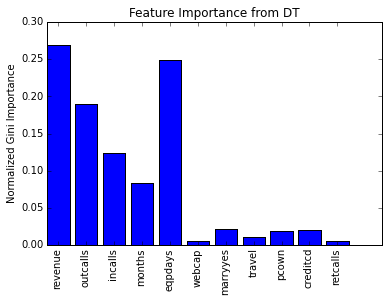

In [290]:
import matplotlib.pyplot as plt
%matplotlib inline

fig=plt.figure()
width = .8
N = len(churn_tree.feature_importances_)
plt.bar(np.arange(N), churn_tree.feature_importances_, width)
plt.xticks(np.arange(N)+.8/2, train_predictors.columns.values, rotation=90)
plt.title('Feature Importance from DT')
plt.ylabel('Normalized Gini Importance')

5\. Is the relationship between the top 3 most important features (as measured here) negative or positive? If your marketing director asked you to explain the top 3 drivers of churn, how would you interpret the relationship between these 3 features and the churn outcome?  What "real-life" connection can you draw between each variable and churn?

To determine the relationship between the top 3 most important features, we first compute the means and medians for these features by subgroup (churners and non-churners).

In [291]:
grouped = test_df.groupby('churndep')
grouped.agg({'revenue':[np.mean, np.median], 'eqpdays':[np.mean, np.median], 'outcalls':[np.mean, np.median]})

eqpdays          outcalls           revenue       
                mean median       mean median       mean median
churndep                                                       
0         369.648465    317  25.666565  13.67  58.456170  47.74
1         423.659330    368  24.276233  12.67  58.665825  47.84

Based on these summary statistics we can suggest the following relationships (though note we have not conducted any hypothesis tests and as such cannot state these relationships with any confidence):

1. On average, it appears people who have had their equipment longer (higher values for "eqpdays") are more likely to churn. It seems probable that people with higher "eqpdays" have older devices (which are likely early or outdated models). Thus, one explanation for this observed relaionship is that people leave the company when they purchase a new device from a competitor.
2. On average, people who make fewer outbound calls are more likely to churn. This seems reasonable, as these customers may be getting less utility from their cell phone, and thus would be more likely to leave the company in search of less expensive plans.
3. On average, people who pay more money (produce higher revenues for the company) are more likely to churn. Again this seems reasonable- people who are paying more may be more likely to seek out new cheaper service providers.

6\. Using the classifier built in 2.2, try predicting `"churndep"` on both the train_df and test_df data sets. What is the accuracy on each?

In [292]:
train_accuracy = round(churn_tree.score(train_predictors, train_target), 4)

test_predictors = test_df.iloc[:,:11]
test_target = test_df.iloc[:,11:12]

test_accuracy = round(churn_tree.score(test_predictors, test_target), 4)

print "Mean predictive accuracy of the decision tree on the training set is " + str(train_accuracy) + "."
print "Mean predictive accuracy of the decision tree on the test set is " + str(test_accuracy) + "."

Mean predictive accuracy of the decision tree on the training set is 0.9999.
Mean predictive accuracy of the decision tree on the test set is 0.5329.


### Part 3 - Finding a Good Decision Tree
The default options for your decision tree may not be optimal. We need to analyze whether tuning the parameters can improve the accuracy of the classifier.  For the following options `min_samples_split` and `min_samples_leaf`:

1\. Generate a list of 10 values of each for the parameters mim_samples_split and min_samples_leaf. 

In [293]:
train_size = len(train_df)

min_samples_split_values = np.arange(0.005, 0.055, 0.005)*train_size
min_samples_split_values = min_samples_split_values.astype(int)
min_samples_leaf_values = np.arange(0.0015, 0.0115, 0.001)*train_size
min_samples_leaf_values = min_samples_leaf_values.astype(int)

print "The minimum split sizes are: ", min_samples_split_values
print "The minimum leaf sizes are: ", min_samples_leaf_values

The minimum split sizes are:  [ 159  318  478  637  797  956 1116 1275 1434 1594]
The minimum leaf sizes are:  [ 47  79 111 143 175 207 239 271 302 334]


2\. Explain in words your reasoning for choosing the above ranges.

I chose the ranges above based on rules of thumb presented in [Decision Tree Validation: A Comprehensive Approach](http://www2.sas.com/proceedings/sugi30/256-30.pdf) by Sylvain Tremblay (SAS).

First, this summary cites the rule of thumb that minimum leaf sizes be between 0.25% and 1% the size of the training data set. Thus, I chose to sample minimum leaf sizes over this range at an interval of 0.1% (starting at the 0.15% the size of the training set). 

Next, Tremblay noted the minimium split size must be at least twice the minimium leaf size (since the size of a parent is the sum of the sizes of its two children in a binary decision tree). Thus, I chose to sample minumum split sizes over a relatively large range, such that for all tested minimum leaf sizes most of the minimum split size values were at least twice as large.


3\. For each combination of values in 3.1 (there should be 100), build a new classifier and check the classifier's accuracy on the test data. Plot the test set accuracy for these options. Use the values of `min_samples_split` as the x-axis and generate a new series (line) for each of `min_samples_leaf`.

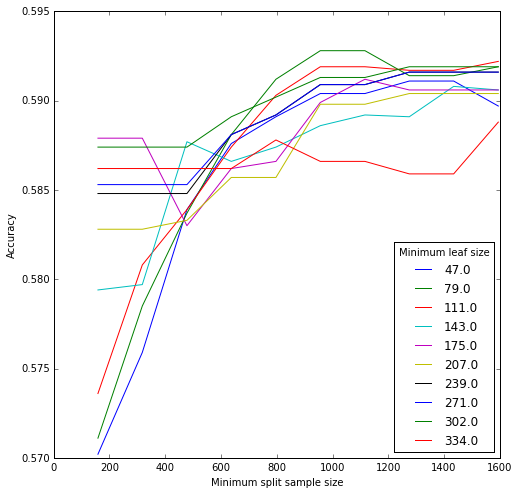

In [294]:
import matplotlib.pyplot as plt
%matplotlib inline

def build_results_dataframe():
    columns = ['min_samples_split','min_samples_leaf','accuracy']
    test_results = pd.DataFrame(columns=columns)
    for min_split in min_samples_split_values:
        for min_leaf in min_samples_leaf_values:
            new_churn_tree = tree.DecisionTreeClassifier(criterion='entropy',min_samples_split=min_split, min_samples_leaf=min_leaf)
            new_churn_tree = new_churn_tree.fit(train_predictors, train_target)
            accuracy = round(new_churn_tree.score(test_predictors, test_target), 4)
            test_results = test_results.append(pd.Series([min_split, min_leaf, accuracy],index=columns),ignore_index=True)
    return test_results
    
test_results = build_results_dataframe()
grouped_results = test_results.groupby('min_samples_leaf')

fig=plt.figure(figsize=(8,8))
for name, group in grouped_results:
    plt.plot(group.min_samples_split, group.accuracy, label=name)
plt.legend(title='Minimum leaf size', loc=4)
plt.xlabel('Minimum split sample size')
plt.ylabel('Accuracy')

4\. Which configuration returns the best accuracy? What is this accuracy? (Note, if you don't see much variation in the test set accuracy across values of min_samples_split or min_samples_leaf, try redoing the above steps with a different range of values).

In [295]:
test_results.ix[test_results['accuracy'].idxmax()]

min_samples_split    956.0000
min_samples_leaf      79.0000
accuracy               0.5928
Name: 51, dtype: float64

The configuration that returns the best accuracy is min_samples_split = 956 and min_samples_leaf = 79 (which achieves and accuracy of 59.28%). Note this corresponds to spliting only if a node has at least 3% of the test set, and only if the children would have at least 0.25% of the test set.

5\. If you were working for a marketing department, how would you use your churn production model in a real business environment? Explain why churn prediction might be good for the business and how one might improve churn by using this model.

First, I would determine the feature importance for each feature in my best decision tree classifier (see below):

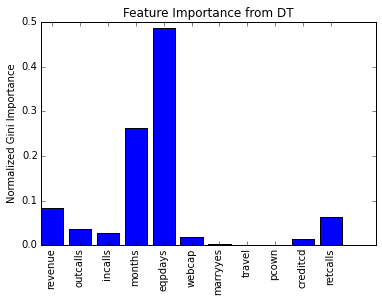

In [296]:
best_churn_tree = tree.DecisionTreeClassifier(criterion='entropy',min_samples_split=956, min_samples_leaf=79)
best_churn_tree = best_churn_tree.fit(train_predictors, train_target)

fig=plt.figure()
width = .8
N = len(best_churn_tree.feature_importances_)
plt.bar(np.arange(N), best_churn_tree.feature_importances_, width)
plt.xticks(np.arange(N)+.8/2, train_predictors.columns.values, rotation=90)
plt.title('Feature Importance from DT')
plt.ylabel('Normalized Gini Importance')

Looking at the feature importance in my best decision tree classier, I see eqpdays and months are the two most important features. Thus, I would likely devise a marketing strategy based on the following premise:

1. On average, people are more likely to churn when: (i) they've been with the company a longer time; and (ii) they've had their device a longer time (and, as such, it is getting older and more out of date).
    
2. To reduce churn, our company should therefore: (i) use our best decision tree classifier (or preferably a model that has a higher test accuracy than 59.62%) to identify likely churners; and (ii) offer these customers a device upgrade (potentially in exchange for signing an extended service contract).
    
Note this is similar to Verizon's old two-year contract model, which offered device upgrades at the end of every service contract (contingent on a customer resigning).